In [91]:
import pysam
import pandas as pd

In [92]:
vcf = pysam.VariantFile("variants.raw.vcf" , "r")

In [93]:

data = []
for variant in vcf:
    variant_info = {
        "CHROM" : variant.chrom,
        # "ID" : variant.id,
        "POS": variant.pos,
        "REF" :  variant.ref,
        "ALT": ','.join(variant.alts),
        "QUAL": variant.qual,
        # "start" : variant.start,
        # "stop" : variant.stop,
        # "alleles" : variant.alleles,
        "FORMAT" : variant.format,
        "INFO" : variant.info,
        # "rlen" :  variant.rlen,
        
    }
    data.append(variant_info) 
df = pd.DataFrame(data)    
print(df)
snps = df[(df['REF'].str.len() == 1) & (df['ALT'].str.len() == 1)]
indels = df[(df['REF'].str.len() != 1) | (df['ALT'].str.len() != 1)]

snps_count = len(snps)
indels_count = len(indels)

print(f"SNP Count: {snps_count}")
print(f"Indel Count: {indels_count}")

             CHROM     POS REF ALT        QUAL    FORMAT  \
0      NC_008611.1      78   C   T  225.417007  [GT, PL]   
1      NC_008611.1     432   G   T  225.417007  [GT, PL]   
2      NC_008611.1     478   G   A  121.415001  [GT, PL]   
3      NC_008611.1     666   C   G  225.417007  [GT, PL]   
4      NC_008611.1     672   G   A  225.417007  [GT, PL]   
...            ...     ...  ..  ..         ...       ...   
32948  NC_005916.1  173268   T   C  225.417007  [GT, PL]   
32949  NC_005916.1  173674   C   T  225.417007  [GT, PL]   
32950  NC_005916.1  173675   A   C  225.417007  [GT, PL]   
32951  NC_005916.1  173714   C   G  225.417007  [GT, PL]   
32952  NC_005916.1  173933   T   C  225.417007  [GT, PL]   

                                               INFO  
0      [DP, VDB, SGB, MQSBZ, MQ0F, AC, AN, DP4, MQ]  
1      [DP, VDB, SGB, MQSBZ, MQ0F, AC, AN, DP4, MQ]  
2      [DP, VDB, SGB, MQSBZ, MQ0F, AC, AN, DP4, MQ]  
3      [DP, VDB, SGB, MQSBZ, MQ0F, AC, AN, DP4, MQ]  
4      [D

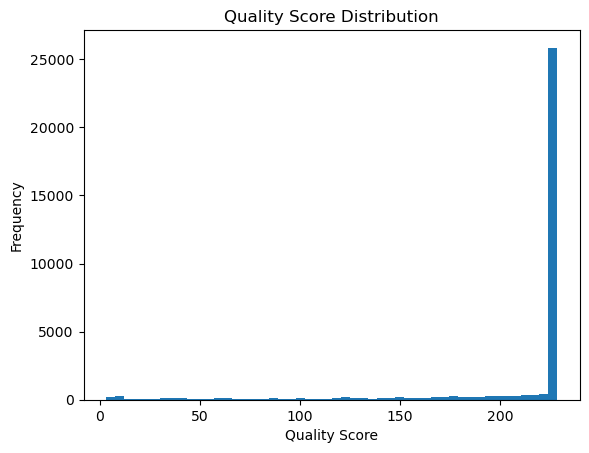

Quality Score Summary:
count    32953.000000
mean       207.409669
std         46.435285
min          3.222230
25%        225.417007
50%        225.417007
75%        225.417007
max        228.414001
Name: QUAL, dtype: float64


In [94]:
import matplotlib.pyplot as plt

# Kalite skoru dağılımı
plt.hist(df['QUAL'].dropna(), bins=50)
plt.xlabel('Quality Score')
plt.ylabel('Frequency')
plt.title('Quality Score Distribution')
plt.show()
qual_summary = df['QUAL'].describe()
print("Quality Score Summary:")
print(qual_summary)

In [95]:
df.to_csv("vcf_analysis_results.csv", index=False)

In [100]:
def read_vcf(vcf_path):
    """VCF dosyasını okur ve bir pandas DataFrame olarak döner."""
    vcf_in = pysam.VariantFile(vcf_path)
    records = []
    
    for record in vcf_in.fetch():
        records.append({
            "CHROM": record.chrom,
            "POS": record.pos,
            "ID": record.id,
            "REF": record.ref,
            "ALT": ','.join(record.alts),
            "QUAL": record.qual,
            "FILTER": ','.join(record.filter.keys()),
            "INFO": record.info["DP"]
        })
    
    return pd.DataFrame(records)

def annotate_variant(variant):
    """Varyant için basit bir anotasyon yapar."""
    chrom = variant['CHROM']
    pos = variant['POS']
    ref = variant['REF']
    alt = variant['ALT']
    
    if len(ref) == 1 and len(alt) == 1:
        annotation = "SNP"
    else:
        annotation = "Indel"
    
    return annotation

def annotate_vcf(vcf_df):
    """VCF DataFrame'i için anotasyon yapar."""
    vcf_df['Annotation'] = vcf_df.apply(annotate_variant, axis=1)
    return vcf_df
    
vcf_path = "variants.raw.vcf"
vcf_df = read_vcf(vcf_path)

annotated_vcf_df = annotate_vcf(vcf_df)

print(annotated_vcf_df)
annotated_vcf_df.to_csv("vcf_annotate_results.csv", index=False)

             CHROM     POS    ID REF ALT        QUAL FILTER  INFO Annotation
0      NC_008611.1      78  None   C   T  225.417007           17        SNP
1      NC_008611.1     432  None   G   T  225.417007           16        SNP
2      NC_008611.1     478  None   G   A  121.415001            5        SNP
3      NC_008611.1     666  None   C   G  225.417007           16        SNP
4      NC_008611.1     672  None   G   A  225.417007           16        SNP
...            ...     ...   ...  ..  ..         ...    ...   ...        ...
32948  NC_005916.1  173268  None   T   C  225.417007           25        SNP
32949  NC_005916.1  173674  None   C   T  225.417007           39        SNP
32950  NC_005916.1  173675  None   A   C  225.417007           39        SNP
32951  NC_005916.1  173714  None   C   G  225.417007           39        SNP
32952  NC_005916.1  173933  None   T   C  225.417007           27        SNP

[32953 rows x 9 columns]


In [101]:
vcf2 = pysam.VariantFile("variants.raw.vcf" , "r")

In [102]:
# Sadece indel olnaların bilgilerini göstermek.
indels = []

for variant in vcf2:
    # Sadece indelleri seçelim: referans veya alternatif alellerin uzunluğu 1'den farklı olmalı
    if len(variant.ref) != 1 or any(len(alt) != 1 for alt in variant.alts):
        # Her indelin bilgilerini bir sözlük olarak saklayalım
        indel_info = {
            'POS': variant.pos,
            'REF': variant.ref,
            'ALT': ",".join(variant.alts),
            "START" : variant.start,
            "STOP" : variant.stop,
            "ALLELEs" : variant.alleles,
            'QUAL': variant.qual,
            'FILTER': ','.join(variant.filter.keys()) if variant.filter.keys() else 'PASS',
        
        }
        
        indels.append(indel_info)

df_indels = pd.DataFrame(indels)
vcf2.close
df_indels.to_csv("vcf_indels_results.csv", index=False)
print(df_indels)

         POS            REF  \
0       1627             CG   
1       5178            GAA   
2      12177             CG   
3      13519            CGG   
4      25291     GCTGGCCGTA   
...      ...            ...   
1653   22743           GCCC   
1654   25216          CGGGG   
1655  139357             TG   
1656  140316  TCCCTCCACGCCC   
1657  159564       GGACCGCC   

                                                    ALT   START    STOP  \
0                                                   CGG    1626    1628   
1                                                  GAAA    5177    5180   
2                                                     C   12176   12178   
3                                                    CG   13518   13521   
4     GCTGGCCGTACTCGGGCGGCGCCTGACCGTAGTCGGATGGGGCCTG...   25290   25300   
...                                                 ...     ...     ...   
1653                                                 GC   22742   22746   
1654                       

In [103]:
vcf2 = pysam.VariantFile("variants.raw.vcf" , "r")

In [104]:
# Sadece SNP olanların bilgilerini göstermek.
snps = []

for variant in vcf2:
    # Sadece snpleri seçelim: referans veya alternatif alellerin uzunluğu 1'den farklı olmalı
    if len(variant.ref) == 1 or any(len(alt) == 1 for alt in variant.alts):
        # Her snpnin bilgilerini bir sözlük olarak saklayalım
        snps_info = {
            'POS': variant.pos,
            'ID': variant.id,
            'REF': variant.ref,
            'ALT': ",".join(variant.alts),
            "START" : variant.start,
            "STOP" : variant.stop,
            "ALLELEs" : variant.alleles,
            'QUAL': variant.qual,
            'FILTER': ','.join(variant.filter.keys()) if variant.filter.keys() else 'PASS',
        
        }
        
        snps.append(snps_info)

df_snps = pd.DataFrame(snps)

df_snps.to_csv("vcf_snps_results.csv", index=False)

print(df_snps)

          POS    ID REF ALT   START    STOP ALLELEs        QUAL FILTER
0          78  None   C   T      77      78  (C, T)  225.417007   PASS
1         432  None   G   T     431     432  (G, T)  225.417007   PASS
2         478  None   G   A     477     478  (G, A)  121.415001   PASS
3         666  None   C   G     665     666  (C, G)  225.417007   PASS
4         672  None   G   A     671     672  (G, A)  225.417007   PASS
...       ...   ...  ..  ..     ...     ...     ...         ...    ...
31583  173268  None   T   C  173267  173268  (T, C)  225.417007   PASS
31584  173674  None   C   T  173673  173674  (C, T)  225.417007   PASS
31585  173675  None   A   C  173674  173675  (A, C)  225.417007   PASS
31586  173714  None   C   G  173713  173714  (C, G)  225.417007   PASS
31587  173933  None   T   C  173932  173933  (T, C)  225.417007   PASS

[31588 rows x 9 columns]


In [105]:
vcf = pysam.VariantFile("ALL.chrMT.phase3_callmom-v0_4.20130502.genotypes.vcf" , "r")

In [106]:

variant_data =[]
for variant in vcf:
    # Alternatif alellerin sayısını kontrol et
    if len(variant.alleles) > 2:
        multi_alel = {
            'POS': variant.pos,
            'ID': variant.id,
            'REF': variant.ref,
            'ALT': ",".join(variant.alts),
            "START" : variant.start,
            "STOP" : variant.stop,
            "ALLELES" : variant.alleles,
            'QUAL': variant.qual,
            'FILTER': ','.join(variant.filter.keys()) if variant.filter.keys() else 'PASS'
            
        }
        variant_data.append(multi_alel)
# Veriyi DataFrame'e dönüştür
df_multiallelic = pd.DataFrame(variant_data)

df_multiallelic.to_csv("vcf_mutiallels_results.csv")

print(df_multiallelic)

       POS    ID     REF                        ALT  START   STOP  \
0       42  None     TCC                      CCC,T     41     44   
1       55  None  TATTTT  T,CATTTT,AATTTT,TTT,TTTTT     54     60   
2       61  None      CG                      TA,AA     60     62   
3       63  None      TC                      CT,AT     62     64   
4       64  None      CT                   TT,AT,TC     63     65   
..     ...   ...     ...                        ...    ...    ...   
270  16355  None      CT                      TT,TC  16354  16356   
271  16390  None       G                        A,T  16389  16390   
272  16399  None      AC                      GC,GT  16398  16400   
273  16519  None       T                        C,A  16518  16519   
274  16524  None       A                        G,C  16523  16524   

                                     ALLELES   QUAL FILTER  
0                              (TCC, CCC, T)  100.0     fa  
1    (TATTTT, T, CATTTT, AATTTT, TTT, TTTTT)  100